In [57]:
import math
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_ind_from_stats

from statsmodels.stats import weightstats as stests

plt.style.use('ggplot')

В файле test_1 лежит результат теста. target - какая-то целевая метрика. Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

H0 - средние равны

In [4]:
df = pd.read_csv('/home/marina/Documents/data_analysis/test_1.csv')

In [66]:
df

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417
...,...,...,...
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478


In [65]:
control_df = df[df.group == 'control']
test_df = df[df.group == 'test']

#Вычислим выборочные средние значения метрики
test_mean = test_df['target'].mean()
control_mean = control_df['target'].mean()

In [67]:
len(test_df), len(control_df)

(1010, 988)

Проверим гомогенность дисперсий

In [68]:
test_df['target'].std(), control_df['target'].std()

(2.5200355159111183, 2.494936558314113)

Разница некритичная

In [74]:
# Запустим t-test для независимых выборок
res = sm.stats.ttest_ind(control_df['target'], test_df['target'])
print("t =", res[0])
print("p-value =", res[1])
print("df = ", res[2])

t = 9.878332719471043
p-value = 1.6802013491375643e-22
df =  1996.0


In [75]:
#ttest_ind(control_df['target'], test_df['target'], equal_var=False)
#print("t =", res[0])
#print("p-value =", res[1])
#print("df = ", res[2])

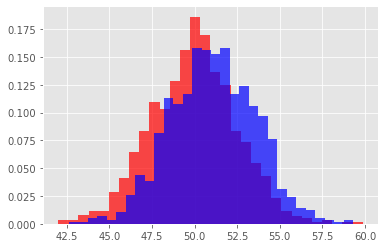

In [72]:
plt.hist(x=test_df['target'], bins=30, density=True, color='red', alpha=0.7)
plt.hist(x=control_df['target'], bins=30, density=True, color='blue', alpha=0.7)
plt.show()

p-value < a=0.05, поэтому отклоняем H0